$\color{brown}{\text{HCIN 620 Lab 3 Python Regression Algorithms}}$

This notebook was adapted from https://www.kaggle.com/hely333/eda-regression 
The supervised linear regression model will determine the cost of treatment based on patient insurance data. In real life, the cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. This practice dataset has no data on diagnosis, but we have enough other information to practice regression analysis.

We'll continue to use the 4-step approach with the following highlights
*   Step 1: Environment Setup 

        import sklearn libraries for data preprocessing and regression analysis
*   Step 2: Data Cleaning - check for missing values
*   Step 3: Exploratory Data Analysis and data preprocessing
         
         Encode Categorical Variables
         Select Targets and Features
         Assign Targets and Features to linear regression variables x and y
         Scale the data
         Split the data
*   Step 4: Build & Evaluate the Models

        Linear Regression model



[Data Dictionary](https://www.kaggle.com/hely333/eda-regression/data) 


Notebook by Reza Afra, Ph.D. and Barbara Berkovich, Ph.D., M.A.

Last update December 31, 2020

# **STEP 1: Environment Setup**

**Import code libraries**
The first set of libraries is the same as Module 2 with the addition of ([numpy.org](https://numpy.org)) to handle the array processing. </br>
**Run Import 1.**


In [25]:
import pandas as pd             # data manipulation library
import io                       # helps with input/output of csv files
import matplotlib.pyplot as plt # a library to plot nice graphs
plt.style.use('ggplot') 
import seaborn as sns           # plot style and color on next line
sns.set(style="white", palette="muted", color_codes=True) 
import numpy as np              # Fast array operations    

print('Import 1 complete')

Import 1 complete


Scikit Learn (Rhymes with psychic) is the main machine learning library in Python. The [scikit-learn.org](https://scikit-learn.org/stable/) maintains the open source code. </br>

**Question 1** Comment each line code in the sklearn imports below to briefly describe how each library is used. Start the inline comments with a #. The first one has been done for you. 

**Run the code to complete the import 2.**

In [26]:
from sklearn.preprocessing import LabelEncoder             #Changes categorical text data to numeric
from sklearn.preprocessing import StandardScaler           #
from sklearn.model_selection import train_test_split       #
from sklearn.linear_model import LinearRegression          #
from sklearn.metrics import r2_score                       #
from sklearn.metrics import mean_squared_error             #
from sklearn.ensemble import RandomForestRegressor         #

print('Import 2 complete')

Import 2 complete


#**STEP 2: Data Cleaning**

**Use the Folder and upload icons (left) to upload data-lab-3-insurance.csv**


**Run the code** to read the insurance data in the Colab Runtime Environment.

In [27]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-3-insurance.csv')



**Question 2** Insert the Python command to display first 5 rows of data. </br>
Run it.

In [28]:
# Add code here to display the first 5 rows of data




**Answer Key 2** data.head()  # Displays first 5 rows of data:
Row number, age, sex, bmi, children, smoker, region, charges


**Run the code below to check for null values.**

In [29]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Question 3**  Interpret the results of the null test. What actions, if any are required to handle nulls?

**Answer 3** [Type answer here]

# **STEP 3: Exploratory Data Analysis(EDA) and Preprocessing**

##Encode Categorical Variables



The categorical variables in our data are sex, smoker and region.
Since the regression model can't handle text directly, we need to encode the categorical data as numeric 1's and 0's. 

**Run the python code** to encode the categorical variables.



In [30]:
from sklearn.linear_model import LogisticRegression


In [31]:
# from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)
data.head()    # Display the changes


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


A few words about coding "region". In general, categorical variables with large variability are best encoded using OneHotEncoder and so on.  But in this case, nothing will change, because there is no special order in which the regions would be listed. 

##Select Targets and Features

**The Target is what we want to predict.** In a regression problem it is a continuous numeric variable.
Since we are primarily interested in the charges, that will be our target.

**The Features are variables used by the model to predict the target.**
Possible features in our dataset include:
age, sex, bmi, children, smoker and region.  

**Feature Engineering** is the process of optimizing the model features.

In this case, we wish to predict charges, so let's see which variables have the highest correlation with 'charges'.

Run the correlation command.

In [32]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

**Question 4** What are the top three features correlated with charges?


**Answer 4** [Type answer here]


A heatmap is a useful plot to further explore correlations between the features and target. 
**Run the Python code to produce the heatmap. **

C:\Users\amunv\AppData\Local\Temp\ipykernel_21676\26824548.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


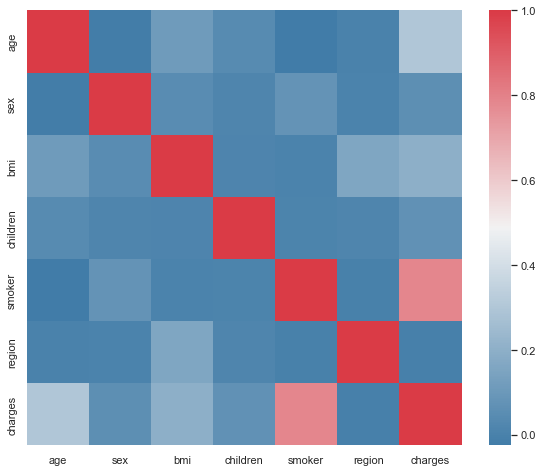

In [33]:
f, ax = plt.subplots(figsize=(10, 8))  
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax);

Red is the highest correlation. The diagonal red line shows that each variable is 100% correlated with itself. Pink and light blue show weaker correlations.

**Question 5** List the top 3 variables correlated with charges in descending order. 


**Answer 5**

1.  [Highest correlation]
2.  [Second highest correlation]
3.  [Third highest correlaton]


Next, let's look at the distribution of charges. This will help us to know how much patients spend on treatment on average.

**Run the seaborn plotting function histplot on the variable 'charges'.**

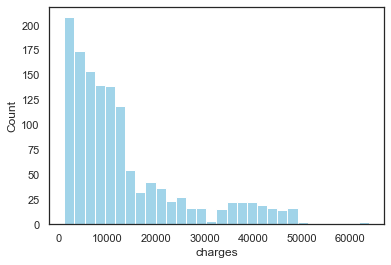

In [34]:
sns.histplot(data['charges'],color='c');     # Seaborn visualization

We can break that down further to see the distribution of charges for smokers and non-smokers. 

**Run the next code section.**

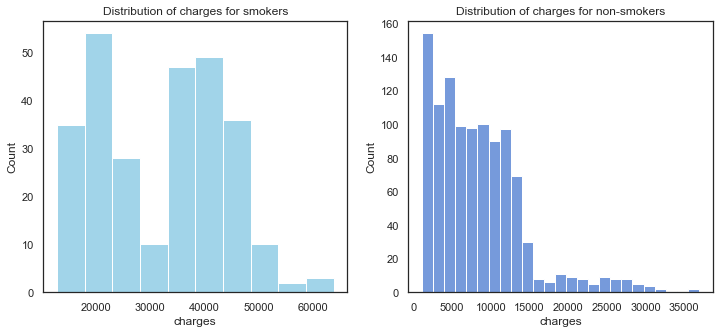

In [35]:
f = plt.figure(figsize=(12,5))

ax = f.add_subplot(121)
sns.histplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)  # this plots charges when the value of smoker = 1
ax.set_title('Distribution of charges for smokers');

ax = f.add_subplot(122)
sns.histplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)  # this plots charges when the value of smoker = 0
ax.set_title('Distribution of charges for non-smokers');

Check the axes on the two plots.

**Question 6** Given the range of charges for smokers vs non-smokers, which group has higher charges?


**Answer 6** [Type answer here]

**Question 7** Given the count of smokers vs non-smokers, which group is larger?

**Answer 7** [Type answer here]

##Assign targets and features to regression variables x and y

For our initial model, we'll select Smoker, Age, BMI as our most promising features. Run the Python code to drop region, sex, and children columns as well as the target 'charges'.  The variable X becomes the features data frame, and the variable Y becomes the target. 

**Run the code.**

In [36]:
# 3.3.2 Choose Features and Target

#x = Features. We drop the columns we don't want.
x = data.drop(['region', 'sex', 'children', 'charges'], axis ='columns') 

#y = Target. In this case, charges.
y = data.charges 

print(x)


      age     bmi  smoker
0      19  27.900       1
1      18  33.770       0
2      28  33.000       0
3      33  22.705       0
4      32  28.880       0
...   ...     ...     ...
1333   50  30.970       0
1334   18  31.920       0
1335   18  36.850       0
1336   21  25.800       0
1337   61  29.070       1

[1338 rows x 3 columns]


##Scale the data

It is obvious that our feature columns each have different ranges:
Smoker 0-1,
Age    0-100,
BMI    0-50

To avoid the problem of over-valuing age or under-valuing smoker status, we must normalize the data. That means to adjust the variables to a common scale.  Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). The StandardScalar function subtracts the mean of each column 
from the data in that column and then divides the result by the standard
deviation of that column. 

**Run the code to scale the data.**


In [37]:

scaler = StandardScaler() # Create a scaler object
x = scaler.fit_transform(x)
y = scaler.fit_transform(np.array(y).reshape(-1, 1)) 
print('scaling complete')
print('new values of array x (age, bmi, smoker)')
x

scaling complete
new values of array x (age, bmi, smoker)


array([[-1.43876426, -0.45332   ,  1.97058663],
       [-1.50996545,  0.5096211 , -0.5074631 ],
       [-0.79795355,  0.38330685, -0.5074631 ],
       ...,
       [-1.50996545,  1.0148781 , -0.5074631 ],
       [-1.29636188, -0.79781341, -0.5074631 ],
       [ 1.55168573, -0.26138796,  1.97058663]])

##Split the data


Since we only have one dataset, we'll split it to create training and testing datasets. The training datasets are like the practice questions your instructors provide prior to an exam. The test data is reserved to see how well the model performs on data it hasn't encountered in the training. </br>
Run the code to split the data.



In [38]:
# Split the data 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print('splitting complete')

splitting complete


#**STEP 4 Model Creation and Evaluation**

##Train the Regression Algorithm

Because we're using the scikit-learn Python extension, we simply need to define the variable linreg as the output of the LinearRegression function. Then we train the function on the feature (x) and target (y) training data. The trained algorithm can now be called a model.

 If we had to write custom code for these functions, it would be so much more difficult!

In [39]:
# Train a linear regression model
linreg = LinearRegression()
linreg.fit(x_train,y_train) # The actual training step
print('3 feature regression training is complete')

3 feature regression training is complete


##Test the Model - 3 feature version

Now we're ready to see how the model performs against the test data. For each row of data, we calculate a prediction variable, (y_pred) based on the linear regression model applied to the test data (x_test). Run the test.

In [40]:
# Testing the model: Predict y_pred based on x_test
y_pred = linreg.predict(x_test)
print('3 feature model has been appplied to test data')


3 feature model has been appplied to test data


##Evaluate Model Performance

Now we're ready to see how the model performed against the test data. For each row of data, we calculate a prediction variable, (y_pred) based on the linear regression model applied to the test data (x_test). The R-square score has values between 0 and 1. It tells us how well the regression line predicted the actual test values.

In [41]:
# Evaluate results of the prediction on the test data

print(f'R-squared: {r2_score(y_true=y_test, y_pred=y_pred):.3}')

R-squared: 0.787


$\color{brown}{\text{Result: R-squared = 0.787 Using 3-Feature model}}$

**Question 8** Interpret the R-squared score. Is it good, bad, or somewhere in between? Is there a standard R=squared score that defines "good" in all cases?

**Answer 8** [Type answer here]

## Train/Test the model again - 6 feature version

We established the model's performance using the three variables of Smoker, Age, and BMI. What do you think will happen if we use all the data we have, and include region, sex and children in the model?

**Question 9** Will the model perform better, worse of the same with more data?

**Answer 9** [Type the answer here]

Run the Python code below run the regression model using all data. The steps are the same as above. We've just combined steps together.

In [42]:
# Define features and target
x = data.drop(['charges'], axis = 1)  
y = data.charges # target

print(x)
 
# Normalize the data
scaler = StandardScaler() # Create a scaler object
x = scaler.fit_transform(x)
y = scaler.fit_transform(np.array(y).reshape(-1, 1))
print('scaling complete') 

# Split the data 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print('splitting complete')

# Create a linear regression object and  train the model
linreg = LinearRegression()
linreg.fit(x_train,y_train) # The actual training step
print('6 feature regression complete')

# Predict on the test data
y_pred = linreg.predict(x_test)


print(f'R-squared: {r2_score(y_true=y_test, y_pred=y_pred):.3}')

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
scaling complete
splitting complete
6 feature regression complete
R-squared: 0.791


In [43]:
r_3_squared = r2_score(y_true=y_test, y_pred=y_pred)
r_3_squared

0.7911113876316934

$\color{brown}{\text{Result: R-squared = 0.791 using 6-Feature Model}}$

**Question 10** What is the difference between the R-squared values for 3- and 6-feature models? Which model would you choose for implementation? Explain your rationale.

**Answer 10** [Type answer here]

#Try RandomForrestRegressor algorithm

There are other regression algorithms that may have advantages over simple linear regression. Let's compare the performance of the sklearn Random Forest Regressor by running the next code section.

In [44]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse', # mse: mean squared error
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train) # The actual training
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R-squared train data: %.3f, R-squared test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 0.024, MSE test data: 0.156
R-squared train data: 0.975, R-squared test data: 0.857


C:\Users\amunv\AppData\Local\Temp\ipykernel_21676\3334563139.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train,y_train) # The actual training
c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [45]:
mse_forest_train = mean_squared_error(y_train,forest_train_pred)
mse_forest_test = mean_squared_error(y_test,forest_test_pred)

In [46]:
mse_forest_train


0.02432194026768895

In [47]:
mse_forest_test 

0.1555210069220496

In [48]:
r2_score_forest_train = r2_score(y_train,forest_train_pred)
r2_score_forest_test= r2_score(y_test,forest_test_pred)

In [49]:
r2_score_forest_train


0.9747194862074527

In [50]:
r2_score_forest_test

0.8570856271038705

We can see improvement when going from vanilla regression to random forests. If we chose this as our model, consider how it might be used in the management of an Accountable Care Organization. 

**Question 11** 
If the same type of input data becomes availabe for prospective patients, 
how might the prediction of their costs be used by the ACO? 
Who might make decisions based on these predictions?
Is 85% accuracy good enough for that purpose?


**Answer 11**  [Type answer here]
